In [1]:
#~Importing Libraries~#

#Scientific Libraries
import numpy as np
import pandas as pd

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pre and pos processing Tools From Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Predictive Power Score (PPS) Library
import ppscore as pps

# Importing Extreme Gradient Boosting Model
from xgboost import XGBRegressor

#warnings Deactivation
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Reading Datasets
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

In [3]:
#Checking train dataset
df_train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,1,1,1,1,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,1,2304400.0,Fortaleza,23.0,CE,3,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,5,5,5,5,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,1,3304557.0,Rio de Janeiro,33.0,RJ,1,9,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,B,B,A,B,A,B,C,A,B,D,B,C,B,C,F,C,2.0,0.0,5.0,5.0,5.0,5,5,5,5,2,5,5,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,1,1505304.0,Oriximiná,15.0,PA,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,A,B,A,B,A,A,A,A,B,A,A,B,A,A,A,B,F,D,5.0,4.0,3.0,5.0,4.0,5,5,4,3,1,4,5,NaN,A,A,A,A,A,A,A,A,A


In [4]:
#Cheking datasets shape
print(df_train.shape)
print(df_test.shape)

(13730, 166)
(4576, 47)


In [0]:
#Checking columns avaiable in the test
cols = list(df_test.columns)
cols.append('NU_NOTA_MT')

In [6]:
#Calculating Predictive Power Score for features
pps.matrix(df_train[cols])

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
NU_INSCRICAO,1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
CO_UF_RESIDENCIA,0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.012201e-02,0.000000e+00,2.596941e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.071075e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.282067e-02,0.000000e+00,9.022182e-03,1.319296e-03,5.671000e-04,4.301639e-03,2.481071e-03,0.000000e+00,1.209751e-02,1.062398e-02,7.480109e-02,4.714823e-02,4.490085e-02,1.925701e-02,3.396591e-02,0.000000e+00,0.000000
SG_UF_RESIDENCIA,0,1.000000e+00,1.000000e+00,4.209214e-02,6.535950e-03,6.870296e-02,9.630319e-04,4.964887e-02,4.523560e-02,2.913809e-02,1.214916e-07,3.519741e-02,4.073905e-02,5.638283e-05,2.143014e-07,1.628908e-05,2.143014e-07,2.143014e-07,5.701010e-04,0.000000e+00,1.622029e-05,0.000000e+00,0.000000e+00,0.000000e+00,8.148523e-03,8.148523e-03,1.337858e-02,1.337858e-02,0.033851,0.041942,0.039791,4.714672e-02,1.441227e-02,3.876490e-02,4.334210e-02,4.202610e-02,3.780693e-02,3.108017e-02,4.243117e-02,3.924842e-02,3.754956e-02,5.763815e-02,4.890878e-02,4.706911e-02,4.153640e-02,1.340660e-02,2.143014e-07,0.043319
NU_IDADE,0,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.906855e-02,3.509536e-01,0.000000e+00,2.787089e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.632326e-02,2.779841e-02,0.000000e+00,0.000000
TP_SEXO,0,1.235584e-02,1.235584e-02,3.029933e-02,1.000000e+00,1.072432e-07,3.115299e-02,1.077519e-02,1.072432e-07,1.072432e-07,1.573137e-07,1.072432e-07,2.566807e-03,1.185031e-03,1.072432e-07,1.072432e-07,1.072432e-07,1.072432e-07,1.072432e-07,1.072432e-07,0.000000e+00,0.000000e+00,0.000000e+00,6.824609e-04,2.172358e-03,2.172358e-03,1.430019e-04,1.430019e-04,0.125638,0.130961,0.098704,1.072432e-07,1.943912e-02,9.605246e-02,2.055890e-02,3.101956e-02,6.431769e-02,1.432191e-07,4.522851e-02,7.486606e-03,1.072432e-07,2.961254e-02,1.294779e-03,1.072432e-07,1.072432e-07,3.413310e-02,1.072432e-07,0.158400
TP_COR_RACA,0,2.805946e-01,2.805946e-01,2.627974e-02,1.423984e-07,1.000000e+00,2.078234e-03,6.307246e-03,4.739753e-03,5.861330e-02,9.333630e-08,1.423984e-07,1.663944e-01,2.436695e-03,1.423984e-07,1.423984e-07,1.423984e-07,1.423984e-07,1.423984e-07,3.961914e-04,1.423984e-07,1.187575e-03,1.187575e-03,0.000000e+00,2.298974e-03,2.298974e-03,8.564068e-04,8.564068e-04,0.117144,0.0862

In [0]:
#Features selected based on PPScore
features = ['TP_ESCOLA',
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'NU_NOTA_MT',
            'NU_NOTA_COMP1',
            'NU_NOTA_COMP2',
            'NU_NOTA_COMP3',
            'NU_NOTA_COMP4',
            'NU_NOTA_COMP5',
            'NU_NOTA_REDACAO',
            'Q001',
            'Q002',
            'Q006',
            'Q024',
            'Q025',
            'Q047'
]

num_features = ['NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'NU_NOTA_MT',
            'NU_NOTA_COMP1',
            'NU_NOTA_COMP2',
            'NU_NOTA_COMP3',
            'NU_NOTA_COMP4',
            'NU_NOTA_COMP5',
            'NU_NOTA_REDACAO']

cat_features = ['TP_ESCOLA',
                'Q001',
                'Q002',
                'Q006',
                'Q024',
                'Q025',
                'Q047'
]

In [0]:
df_cleaned = df_train[features]

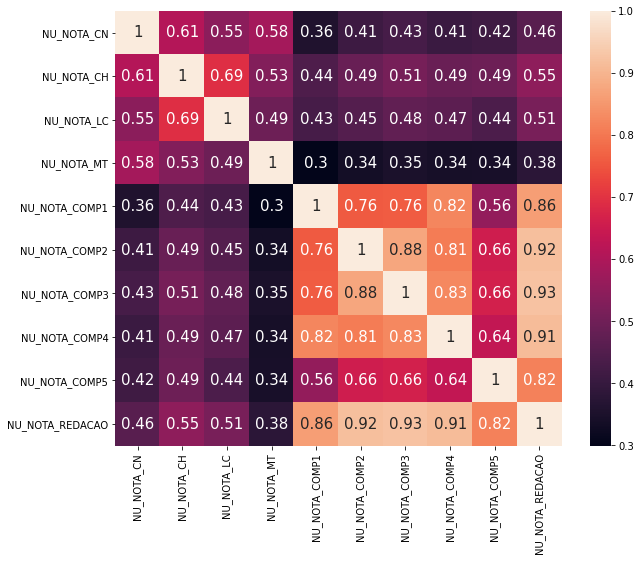

In [9]:
#Correlation Matrix numeric variables
corr = df_cleaned[num_features].corr()
ax = plt.subplots(figsize=(10, 8));
sns.heatmap(corr,  annot=True, annot_kws={"size": 15});

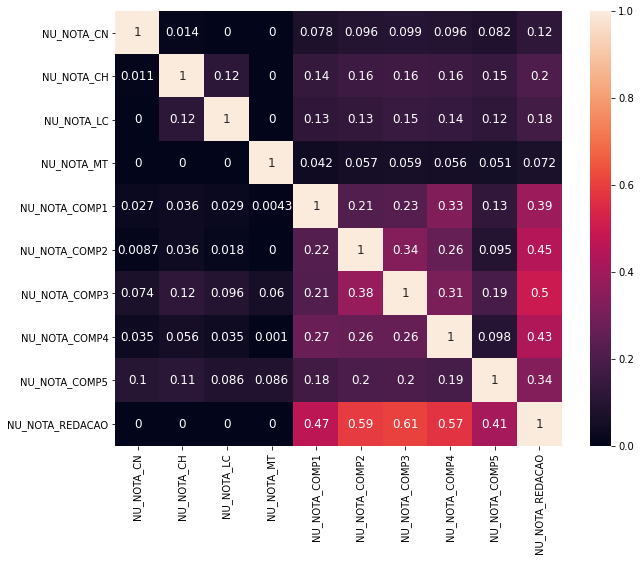

In [10]:
#PPS Matrix numeric variables
pps = pps.matrix(df_cleaned[num_features])
ax = plt.subplots(figsize=(10, 8));
sns.heatmap(pps,  annot=True, annot_kws={"size": 12});

In [11]:
#Missing Data
df_cleaned.isnull().sum()

TP_ESCOLA             0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_MT         3597
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
Q001                  0
Q002                  0
Q006                  0
Q024                  0
Q025                  0
Q047                  0
dtype: int64

In [0]:
#Imputing missing data
# Replace "escola do exterior" by "privada"
df_cleaned.loc[(df_cleaned.TP_ESCOLA == 4),'TP_ESCOLA']=3
#Fill all NaN with -1
df_cleaned.fillna(-1, inplace=True)

In [13]:
#Checking fillna processing
df_cleaned.isnull().sum()

TP_ESCOLA          0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
Q001               0
Q002               0
Q006               0
Q024               0
Q025               0
Q047               0
dtype: int64

In [14]:
df_cleaned.shape

(13730, 17)

In [0]:
features_test = ['TP_ESCOLA',
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'NU_NOTA_COMP1',
            'NU_NOTA_COMP2',
            'NU_NOTA_COMP3',
            'NU_NOTA_COMP4',
            'NU_NOTA_COMP5',
            'NU_NOTA_REDACAO',
            'Q001',
            'Q002',
            'Q006',
            'Q024',
            'Q025',
            'Q047'
]

df_test = df_test[features_test]

In [0]:
#Imputing missing data in the test set
# Replace "escola do exterior" by "privada"
df_test.loc[(df_test.TP_ESCOLA == 4),'TP_ESCOLA']=3
#Fill all NaN with -1
df_test.fillna(-1, inplace=True)

In [0]:
#Encoding categorical Vars
train_f = pd.get_dummies(df_cleaned, columns=cat_features)
df_test = pd.get_dummies(df_test, columns=cat_features)

In [0]:
# Separate features and "target var"
x = train_f.drop('NU_NOTA_MT', axis = 1)
y = train_f['NU_NOTA_MT']

In [20]:
#Spliting Train data in train and validation
Xtr, Xval, ytr, yval = train_test_split(x,y, train_size = 0.80, random_state = 42)
Xtr.shape, Xval.shape, ytr.shape, yval.shape

((10984, 57), (2746, 57), (10984,), (2746,))

In [0]:
#Standazing datasets
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xval = scaler.transform(Xval)
ytr = ytr.values
yval = yval.values
#test
df_predict = scaler.fit_transform(df_test)

In [22]:
# Implemeting XGBoost model
# The parameters were tuned using the Hyperopt Library
# Check it out at: https://github.com/hyperopt/hyperopt
model = XGBRegressor(n_estimators = 200,
                          n_fold = 10,
                          num_parallel_tree = 200,
                          colsample_bytree = 0.8404,
                          gamma = 0.6938,
                          learning_rate = 0.0408,
                          max_depth = 4,
                          min_child_weight = 3.5238,
                          reg_alpha = 0.3932,
                          reg_lambda = 0.0457,
                          subsample = 0.7949,
                          objective = 'reg:squarederror',
                     n_jobs=-1)

model.fit(Xtr, ytr, early_stopping_rounds=15, eval_set=[(Xval, yval)], verbose=True)

[0]	validation_0-rmse:402.501
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:386.547
[2]	validation_0-rmse:371.26
[3]	validation_0-rmse:356.615
[4]	validation_0-rmse:342.58
[5]	validation_0-rmse:329.136
[6]	validation_0-rmse:316.256
[7]	validation_0-rmse:303.922
[8]	validation_0-rmse:292.113
[9]	validation_0-rmse:280.806
[10]	validation_0-rmse:269.982
[11]	validation_0-rmse:259.624
[12]	validation_0-rmse:249.713
[13]	validation_0-rmse:240.23
[14]	validation_0-rmse:231.16
[15]	validation_0-rmse:222.486
[16]	validation_0-rmse:214.194
[17]	validation_0-rmse:206.266
[18]	validation_0-rmse:198.694
[19]	validation_0-rmse:191.46
[20]	validation_0-rmse:184.552
[21]	validation_0-rmse:177.955
[22]	validation_0-rmse:171.658
[23]	validation_0-rmse:165.652
[24]	validation_0-rmse:159.925
[25]	validation_0-rmse:154.465
[26]	validation_0-rmse:149.265
[27]	validation_0-rmse:144.31
[28]	validation_0-rmse:139.596
[29]	validation_0-rmse:135.11
[30]	validation_0-rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8404, gamma=0.6938,
             importance_type='gain', learning_rate=0.0408, max_delta_step=0,
             max_depth=4, min_child_weight=3.5238, missing=None,
             n_estimators=200, n_fold=10, n_jobs=-1, nthread=None,
             num_parallel_tree=200, objective='reg:squarederror',
             random_state=0, reg_alpha=0.3932, reg_lambda=0.0457,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.7949,
             verbosity=1)

In [0]:
#Predict using ajusted model in the Test dataset
y_pred_test = model.predict(df_predict)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['NU_NOTA_MT'])

In [24]:
#Checking out the shape of the final result 
y_pred_test.shape

(4576, 1)

In [0]:
#Reading test dataset again
df_test = pd.read_csv('test.csv')

In [0]:
#Concatenating the answer and with NU_INSCRICAO and TP_PRESENCA_CN
horizontal_stack = pd.concat([df_test['NU_INSCRICAO'].reset_index(drop=True), df_test['TP_PRESENCA_CN'].reset_index(drop=True), y_pred_test], axis=1)

In [28]:
horizontal_stack.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,428.144928
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,457.722076
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,587.646912
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-56.266090
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,558.306152


In [0]:
#The "CN" test is in the same day as the Math one
#if the a candidate missed one, they missed both
#So, in the final result student who misssed the test will have np.nan in the score
horizontal_stack.loc[(horizontal_stack.TP_PRESENCA_CN == 0),'NU_NOTA_MT']=np.nan

In [0]:
#this candidate got a score less than the TRI 
#So I decided to replace it with a quantile 
horizontal_stack.loc[(horizontal_stack.NU_INSCRICAO == 'fc59feb8b75f22a86ef27bf267a3e7f8712b8a42'),'NU_NOTA_MT'] = horizontal_stack['NU_NOTA_MT'].quantile(0.025)

In [0]:
#Dropping the attendance column
horizontal_stack = horizontal_stack.drop(['TP_PRESENCA_CN'], axis=1)

In [59]:
horizontal_stack.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,428.144928
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,457.722076
2,b38a03232f43b11c9d0788abaf060f7366053b6d,587.646912
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,558.306152


In [0]:
#Saving for submission
horizontal_stack.to_csv('answer.csv', index=False, sep="," , encoding="UTF8")